# Logistic Regression Example

## Programming Lab: 051_01 Logistic Regression

이번 실습에서는 기본적인 NumPy와 Matplotlib의 사용법을 익히고, Gradient Descent Method을 이용하여 predictor를 학습시켜 봅니다.

실습은 다음과 같은 단계로 이루어집니다.

<ul>
    <li> Step.1 Data Samples </li>    
    강의 자료의 학습 데이터를 입력합니다.
    <li> Step.2 Sigmoid Function </li>    
    Sigmoid 함수를 정의하고 그래프를 그립니다.
    <li> Step.3 Gradient Descent Method (1) : Batch Gradient Descent</li>
    cost function에 대해 GDM을 이용하여 predictor를 학습시킵니다.
    <li> Step.4 Gradient Descent Method (2) : Stochastic Gradient Descent (SGD)</li>
    loss function에 대해 GDM을 이용하여 predictor를 학습시킵니다.
    <li> Step.5 Inference</li>
    학습한 모델에 대해 성능 평가를 수행합니다.
</ul>

먼저 다음 셀을 실행시켜 필요한 library들을 import하세요.

In [2]:
import numpy as np, collections
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import confusion_matrix

plt.style.use('seaborn')
np.random.seed(0)

## Step.1 Input dataset

***
### Data Samples

Logisitc regression model을 학습시키기 위한 dataset을 먼저 입력합니다. dataset은

(x, y) = (2, 0), (4, 0), (6, 0), (8, 1), (10, 1), (12, 1) (14, 1)

***
**Programming**

이번 실습에서는 강의 자료에서 사용한 7개의 data sample들을 입력합니다.

(Hint.1) data 변수에 학습 데이터를 2차원 리스트로 저장합니다.

Text(0, 0.5, 'y data')

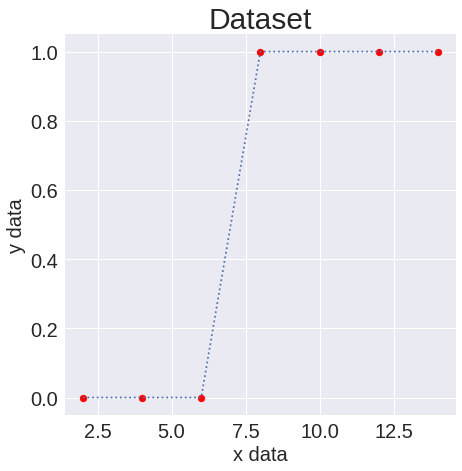

In [3]:
##### Start Your Code(Dataset Generation) #####
data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14,1]]
##### End Your Code(Dataset Generation) #####

x_data = np.array([i[0] for i in data])
y_data = np.array([i[1] for i in data])

# Target Function Visualization
fig, ax = plt.subplots(figsize = (7,7))
ax.plot(x_data, y_data, linestyle = ':')

# Dataset Visualization
ax.scatter(x_data, y_data, color = 'r')
ax.tick_params(axis = 'both', labelsize = 20)
ax.set_title("Dataset", fontsize = 30)
ax.set_xlabel("x data", fontsize = 20)
ax.set_ylabel("y data", fontsize = 20)

**Expected Output**  
<img src="./imgs/01_01.png" width = 400>

## Step.2 Sigmoid Function

Sigmoid 함수를 정의하고 그래프를 확인합니다.  

***
**Programming**

이번 실습에서는 Sigmoid 함수를 정의하고 그래프를 확인합니다. 다음의 Sigmoid 함수를 그려봅니다.  
$$ \hat{y} = \frac{1}{1 + e^{-(1*x+0)}}$$

(Hint.1) Sigmoid 함수의 입력을 위한 w와 b를 설정합니다.

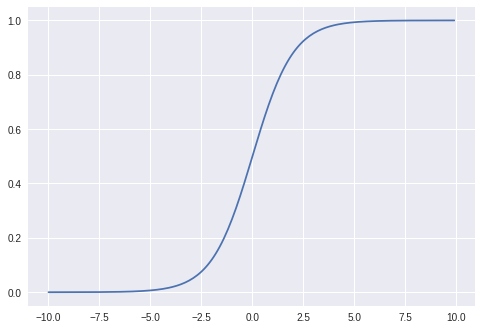

In [4]:
def sigmoid(x):
    return 1 / (1 + np.e ** (-x))

##### Start Your Code(Dataset Generation) #####
w = 1
b = 0
##### End Your Code(Dataset Generation) #####
x_range = (np.arange(-10, 10, 0.1))
plt.plot(x_range, np.array([sigmoid(w*x + b) for x in x_range]))

**Expected Output**  
<img src="./imgs/01_02.png" width = 400>

## Step.3 Gradient Descent Method (1) : Batch Gradient Descent

위의 dataset에 따라 predictor는
$$ \hat{y} = \frac{1}{1 + e^{-w^{T}x}}$$
로 설정할 수 있습니다. 

그리고 dataset에 대한 cost($\mathcal{J}$)는 
$$ \mathcal{J} = \frac{1}{2n} \sum_{i=k}^N (y^{(k)}˙log(\hat{y}) - (1-y^{(k)})˙log(1-\hat{y}) $$
로 정의됩니다.

따라서 $w$에 대한 $\mathcal{J}$의 partial derivative는
$$ \frac{\partial \mathcal{J}}{\partial w_{i}} = \frac{1}{n} \sum_{k=1}^N (\hat{y}^{(k)} - y^{(i)}) x^{(k)}, (i=0, 1, ..., M)$$
입니다.

마지막으로 이를 이용한 Gradient descent method는

$$ w_{i} := w_{i} - \alpha \frac{\partial \mathcal{J}}{\partial w_{i}} = w_{i} - \alpha \frac{1}{n} \sum_{k=1}^N (\hat{y}^{(k)} - y^{(k)}) x^{(k)}, (i=0, 1, ..., M)$$
입니다.

***
**Programming**

초기 $w, b$는 각 0.0, 0.0 그리고 학습률(learning rate) $lr$은 0.1, 총 세대(epoch) $epochs$는 20001으로 설정하고 gradient descent method를 이용하여 optimal $w$와 $b$에 대한 approximation을 진행하세요.

(Hint.1) 초기값을 설정합니다.  
(Hint.2) 현재 파라미터를 사용하여 예측을 수행하고 손실을 계산합니다. (list comprehension 사용)  
(Hint.3) $w, b$에 대한 비용 함수(cost function)의 미분을 계산하여 w_diff와 b_diff 변수에 저장합니다.  
(Hint.4) w와 b에 대한 gradient descent를 수행합니다.

epoch=0, w=0.2286, b=0.0071
epoch=2000, w=1.0990, b=-7.4539
epoch=4000, w=1.4334, b=-9.8364
epoch=6000, w=1.6681, b=-11.4957
epoch=8000, w=1.8543, b=-12.8078
epoch=10000, w=2.0101, b=-13.9049
epoch=12000, w=2.1449, b=-14.8520
epoch=14000, w=2.2638, b=-15.6872
epoch=16000, w=2.3703, b=-16.4351
epoch=18000, w=2.4668, b=-17.1125
epoch=20000, w=2.5551, b=-17.7319


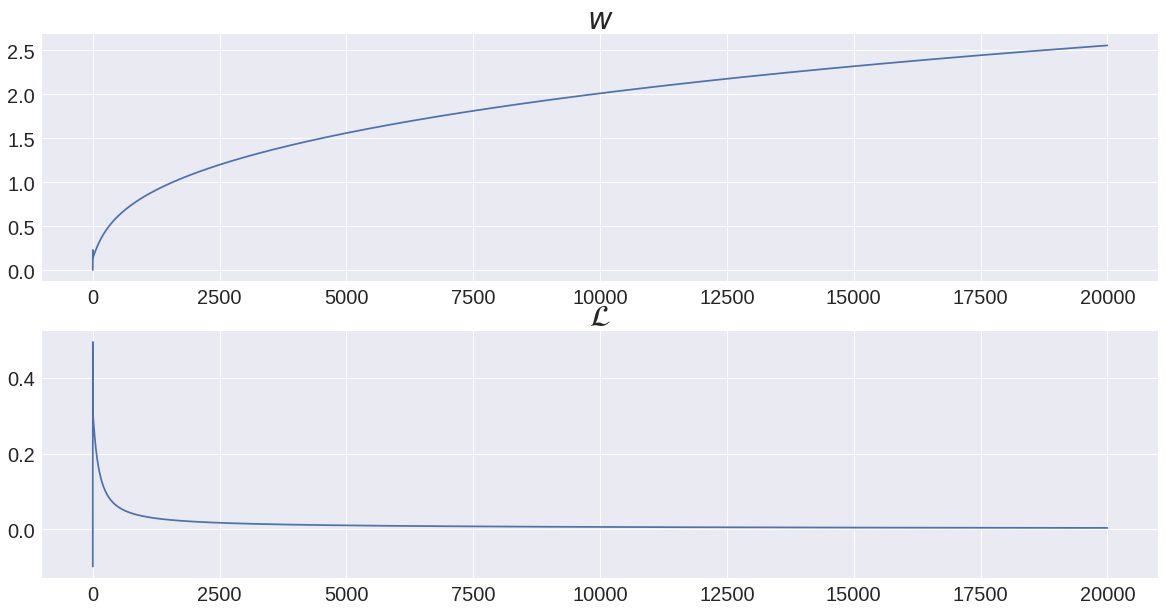

In [6]:
##### Start Your Code(Learning Preparation) #####
w = 0.0
b = 0.0
lr = 0.1
epochs = 20001
##### End Your Code(Learning Preparation) #####

w_list = []
cost_list = []

for epoch in range(epochs):
    ##### Start Your Code(Loss Calculation) #####
    pred = sigmoid(w*x_data+b)
    loss = [y*np.log(y_hat) - (1-y)*np.log(1-y_hat) for y, y_hat in zip(y_data, pred)]
    ##### End Your Code(Loss Calculation) #####

    w_list.append(w)
    cost_list.append(np.mean(loss))

    ##### Start Your Code(Gradient Calculation) #####
    w_diff = np.mean((pred-y_data)*x_data)
    b_diff = np.mean(pred-y_data)
    ##### End Your Code(Gradient Descent Method) #####

    ##### Start Your Code(Gradient Descent Method) #####
    w = w - lr*w_diff
    b = b - lr*b_diff
    ##### End Your Code(Gradient Descent Method) #####

    if epoch % 2000 == 0:
        print("epoch=%d, w=%.04f, b=%.04f" % (epoch, w, b))

fig, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].plot(w_list)
ax[1].plot(cost_list)
ax[0].set_title(r'$w$', fontsize = 30)
ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)
for ax_idx in range(2):
    ax[ax_idx].tick_params(axis = 'both', labelsize = 20)

**Expected Output**  
  
epoch=0, w=0.2286, b=0.0071  
epoch=2000, w=1.0990, b=-7.4539  
epoch=4000, w=1.4334, b=-9.8364  
epoch=6000, w=1.6681, b=-11.4957  
epoch=8000, w=1.8543, b=-12.8078  
epoch=10000, w=2.0101, b=-13.9049  
epoch=12000, w=2.1449, b=-14.8520  
epoch=14000, w=2.2638, b=-15.6872  
epoch=16000, w=2.3703, b=-16.4351  
epoch=18000, w=2.4668, b=-17.1125  
epoch=20000, w=2.5551, b=-17.7319  

<img src="./imgs/01_03.png">

### Plot Graph
이전 단계에서 구한 최적의 $w, b$를 사용하여 target function에 대한 그래프와 입력 데이터를 중첩하여 표시합니다.

w: 2.555, b: -17.732


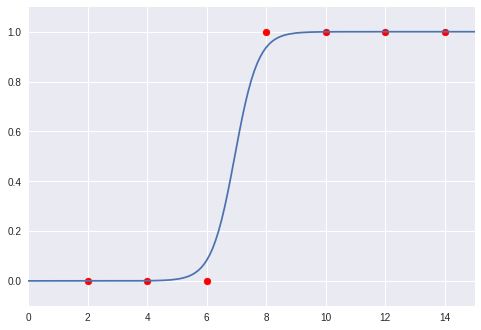

In [7]:
print('w: %.3f, b: %.3f' % (w, b))

plt.scatter(x_data, y_data, color = 'r')
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)

x_range = (np.arange(min(x_data)-2, max(x_data)+2, 0.1))
plt.plot(x_range, np.array([sigmoid(w*x + b) for x in x_range]))

**Expected Output**  
  
w: 2.555, b: -17.732  
<img src="./imgs/01_04.png" width = 400>

### Step.4 Gradient Descent Method (2) : Stochastic Gradient Descent (SGD)

위의 dataset에 따라 predictor는
$$ \hat{y} = \frac{1}{1 + e^{-w^{T}x}}$$
로 설정할 수 있습니다. 

그리고 dataset에 대한 loss($\mathcal{L}^{(i)}$)는 
$$ \mathcal{J} = y^{(i)}˙log(\hat{y}) - (1-y^{(i)})˙log(1-\hat{y} $$
로 정의됩니다.

따라서 $w$에 대한 $\mathcal{L}^{(i)}$의 partial derivative는
$$ \frac{\partial \mathcal{J}}{\partial w_{i}} = (\hat{y}^{(k)} - y^{(k)}) x^{(k)}$$
입니다.

마지막으로 이를 이용한 Gradient descent method는

$$ w_{i} := w_{i} - \alpha \frac{\partial \mathcal{L}^{(k)}}{\partial w_{i}} = w_{i} - \alpha (\hat{y}^{(k)} - y^{(k)}) x^{(k)}, (i=0, 1, ..., M)$$
입니다.

***
**Programming**

초기 $w, b$는 각 0.0, 0.0 그리고 학습률(learning rate) $lr$은 0.05, 총 세대(epoch) $epochs$는 20001으로 설정하고 gradient descent method를 이용하여 optimal $w$와 $b$에 대한 approximation을 진행하세요.

(Hint.1) 초기값을 설정합니다.  
(Hint.2) 현재 파라미터를 사용하여 예측을 수행하고 손실을 계산합니다.  
(Hint.3) $w, b$에 대한 손실 함수(lost function)의 미분을 계산하여 w_diff와 b_diff 변수에 저장합니다.  
(Hint.4) w와 b에 대한 gradient descent를 수행합니다.

epoch=0, w=-0.0500, b=-0.0250
epoch=2000, w=1.9065, b=-12.9489
epoch=4000, w=2.3967, b=-16.4859
epoch=6000, w=2.7175, b=-18.7745
epoch=8000, w=2.9580, b=-20.4816
epoch=10000, w=3.1508, b=-21.8466
epoch=12000, w=3.3120, b=-22.9851
epoch=14000, w=3.4505, b=-23.9623
epoch=16000, w=3.5720, b=-24.8185
epoch=18000, w=3.6802, b=-25.5805
epoch=20000, w=3.7777, b=-26.2672


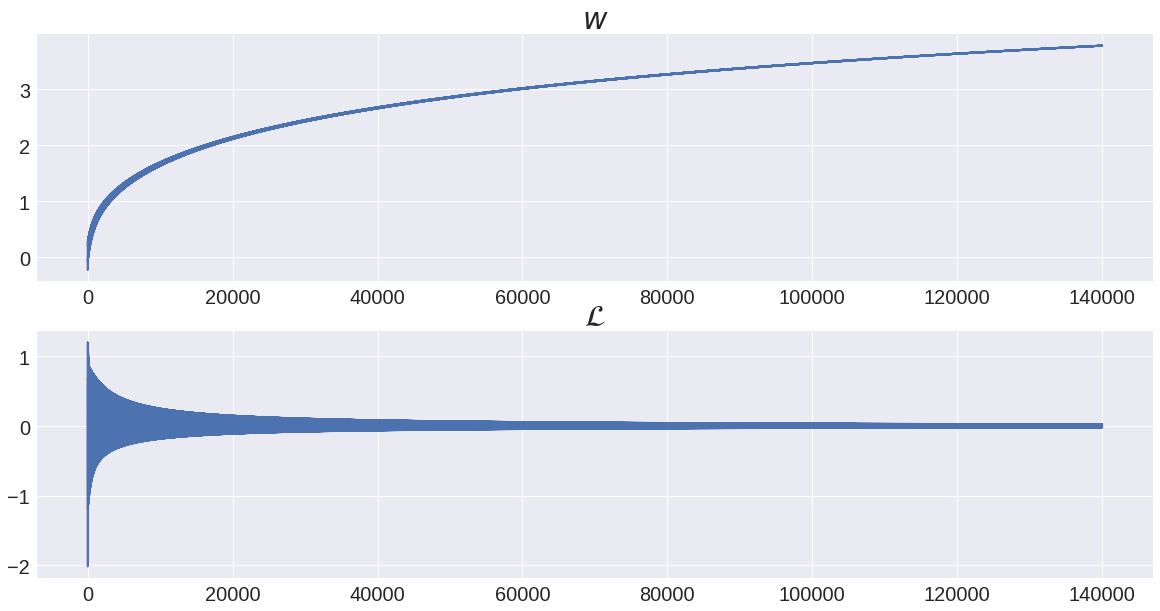

In [9]:
##### Start Your Code(Learning Preparation) #####
w = 0.0
b = 0.0
lr = 0.05
epochs = 20001
##### End Your Code(Learning Preparation) #####

w_list = []
loss_list = []

for epoch in range(epochs):
    for data_idx, (x, y) in enumerate(zip(x_data, y_data)):
        ##### Start Your Code(Loss Calculation) #####
        pred = sigmoid(w*x+b)
        loss = y*np.log(pred)-(1-y)*np.log(1-pred)
        ##### End Your Code(Loss Calculation) #####

        w_list.append(w)
        loss_list.append(loss)
        
        ##### Start Your Code(Gradient Calculation) #####
        w_diff = (pred-y)*x
        b_diff = pred-y
        ##### End Your Code(Gradient Descent Method) #####

        ##### Start Your Code(Gradient Descent Method) #####
        w = w - lr*w_diff
        b = b - lr*b_diff
        ##### End Your Code(Gradient Descent Method) #####

        if (epoch % 2000 == 0) and (data_idx == 0):
            print("epoch=%d, w=%.04f, b=%.04f" % (epoch, w, b))
        
fig, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].plot(w_list)
ax[1].plot(loss_list)
ax[0].set_title(r'$w$', fontsize = 30)
ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)
for ax_idx in range(2):
    ax[ax_idx].tick_params(axis = 'both', labelsize = 20)

**Expected Output**  
  
epoch=0, w=-0.0500, b=-0.0250  
epoch=2000, w=1.9065, b=-12.9489  
epoch=4000, w=2.3967, b=-16.4859  
epoch=6000, w=2.7175, b=-18.7745  
epoch=8000, w=2.9580, b=-20.4816  
epoch=10000, w=3.1508, b=-21.8466  
epoch=12000, w=3.3120, b=-22.9851  
epoch=14000, w=3.4505, b=-23.9623  
epoch=16000, w=3.5720, b=-24.8185  
epoch=18000, w=3.6802, b=-25.5805  
epoch=20000, w=3.7777, b=-26.2672  

<img src="./imgs/01_05.png">

### Plot Graph
이전 단계에서 구한 최적의 $w, b$를 사용하여 target function에 대한 그래프와 입력 데이터를 중첩하여 표시합니다.

w: 3.778, b: -26.267


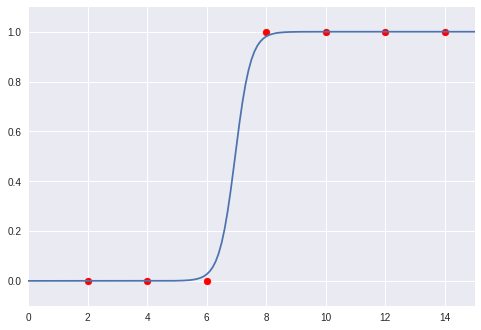

In [10]:
print('w: %.3f, b: %.3f' % (w, b))

plt.scatter(x_data, y_data, color = 'r')
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)

x_range = (np.arange(min(x_data)-2, max(x_data)+2, 0.1))
plt.plot(x_range, np.array([sigmoid(w*x + b) for x in x_range]))

**Expected Output**  
  
w: 3.778, b: -26.267  
<img src="./imgs/01_06.png" width = 400>

## Step.5 Inference

***
### Test Data Samples

Logisitc regression model을 테스트하기 위한 dataset을 입력합니다. dataset은

(x, y) = (9, 0), (30, 1), (17, 1), (2, 0), (40, 1)

***
**Programming**

5개의 test data sample들을 입력합니다.

(Hint.1) test 변수에 테스트 데이터를 2차원 리스트로 저장합니다.

In [19]:
##### Start Your Code(Dataset Generation) #####
test = [[9, 0], [30, 1], [17, 1], [2, 0], [40, 1]]
##### End Your Code(Dataset Generation) #####

testX = np.array([i[0] for i in test])
testy = np.array([i[1] for i in test])

**Expected Output**  
  
예측: [1. 1. 1. 0. 1.]  
실제: [0, 1, 1, 0, 1]  
테스트 데이터 정확도: 0.8

### Inference

학습한 Logisitc regression model을 테스트합니다.  

***
**Programming**

임계값(0.5)를 기준으로 임계값 이상이면 1, 미만이면 0으로 분류합니다.  

(Hint.1) thresh 변수에 임계값을 설정합니다.  
(Hint.2) 테스트 데이터에 대해 추론을 수행하여 결과를 probs 변수에 저장합니다. (list comprehension 사용)  

In [20]:
##### Start Your Code(Threshold Preparation) #####
thresh = 0.5
##### End Your Code(Threshold Preparation) #####

##### Start Your Code(Threshold Preparation) #####
probs = sigmoid(w*testX+b)
##### End Your Code(Threshold Preparation) #####

print('예측:', np.round(probs, 3))
print('실제:', testy)

predict = probs >= thresh
result = predict == testy
acc = collections.Counter(result)[True] / len(testX)
print('테스트 데이터 정확도:', acc)

예측: [1. 1. 1. 0. 1.]
실제: [0 1 1 0 1]
테스트 데이터 정확도: 0.8


### Plot Graph
target function에 대한 그래프와 테스트 데이터를 중첩하여 표시합니다.

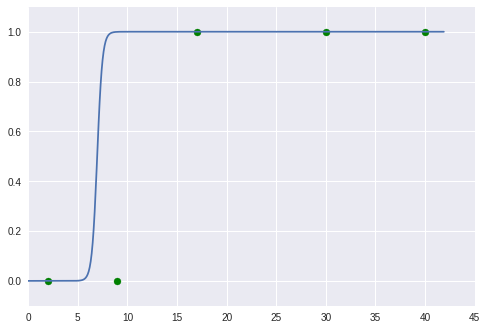

In [21]:
plt.scatter(testX, testy, color='g')
plt.xlim(-0, 45)
plt.ylim(-.1, 1.1)

x_range = (np.arange(min(testX)-2, max(testX)+2, 0.1))
plt.plot(x_range, np.array([sigmoid(w*x + b) for x in x_range]))

**Expected Output**  
<img src="./imgs/01_07.png" width = 400>

### Performance Evaluation
Confusion matrix를 사용하여 추론 결과에 대해 성능 평가를 수행합니다.

In [22]:
cm = confusion_matrix(testy, predict, labels=[0, 1])
print('confusion matrix:')
print(cm)

confusion matrix:
[[1 1]
 [0 3]]


**Expected Output**  
  
confusion matrix:  
[[1 1]  
 [0 3]]